In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfe-dataset/attacks_2019_300_clean.csv
/kaggle/input/pfe-dataset/Dataset_Reduced_300.csv
/kaggle/input/pfe-dataset/attacks_2017.csv
/kaggle/input/pfe-dataset/attacks_2017_2018.csv
/kaggle/input/pfe-dataset/attacks_2018.csv
/kaggle/input/pfe-dataset/augmented_datast_300.csv


# Data Preprocessing

In [ ]:

import random

filename = "/kaggle/input/pfe-dataset/attacks_2017_2018.csv"

# Get the number of lines
num_lines = sum(1 for l in open(filename))

# Size of 1% of lines
size = int(num_lines / 2)

# The row indices to skip - make sure 0 is not included to keep the header!
skip_idx = random.sample(range(1, num_lines), num_lines - size)

# Read the random sample of rows
df = pd.read_csv(filename, skiprows=skip_idx)

# 2017_2018

In [ ]:
df= pd.read_csv("/kaggle/input/pfe-dataset/attacks_2017_2018.csv",low_memory=False)

In [ ]:
import pandas as pd

# Define a dictionary to store the number of samples to select from each label
label_counts = {
    "DDoS-LOIT":12500,
    "DoS slowloris":12500,
    "DoS Slowhttptest":5907,
    "DoS Hulk":12500,
    "DoS GoldenEye":12500,
    "DDoS LOIC-UDP" :1730,
    "DDoS HOIC" :12500,
    "DDoS LOIC-HTTP"  :12500                            
}
df_sample= pd.DataFrame()
for label, count in label_counts.items():
    if  count >0:
        rows=df[df["Label"] == label].shape[0]
        print(label,rows)
            
        label_chunk = df[df["Label"] == label].sample(n=min(count,rows))
        label_counts[label]=max(0,count-rows)
        df_sample=pd.concat([df_sample,label_chunk])
        
print("Dataset reduction Completed",df_sample.shape)

In [ ]:
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df_sample[df_sample['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df_sample)
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X,y=smote.fit_resample(df_sample.drop(columns="Label"),df_sample["Label"])

In [ ]:
df=pd.concat([pd.DataFrame(X), pd.DataFrame({'Label': y})], axis=1)

In [ ]:
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [ ]:
df.to_csv("attacks_2017_2018_augmented.csv",index=False)

# 2019 

In [10]:
df= pd.read_csv("/kaggle/input/pfe-dataset/attacks_2019_300_clean.csv")


## Stratigy based

In [4]:
attack_groups = {
    "DrDoS": ["DrDoS_DNS", "DrDoS_LDAP", "DrDoS_MSSQL", "DrDoS_NetBIOS", "DrDoS_NTP", "DrDoS_SNMP", "DrDoS_SSDP", "DrDoS_UDP"],
    "DDoS": ["DDOS HOIC", "DDoS LOIC-HTTP", "DDoS-LOIT"],
    "DoS": ["DoS Slowhttptest", "DoS Hulk", "DoS GoldenEye", "DoS slowloris","NetBIOS", "LDAP", "MSSQL", "Portmap", "Syn", "TFTP", "UDP", "UDP-lag"]
}

for group, attacks in attack_groups.items():
    for attack in attacks:
        df.loc[df['Label'] == attack, 'Label'] = group


_________ Type attacks _________$
         0        1
0    DrDoS      DoS
1  2241561  1949964
_________              _________$


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


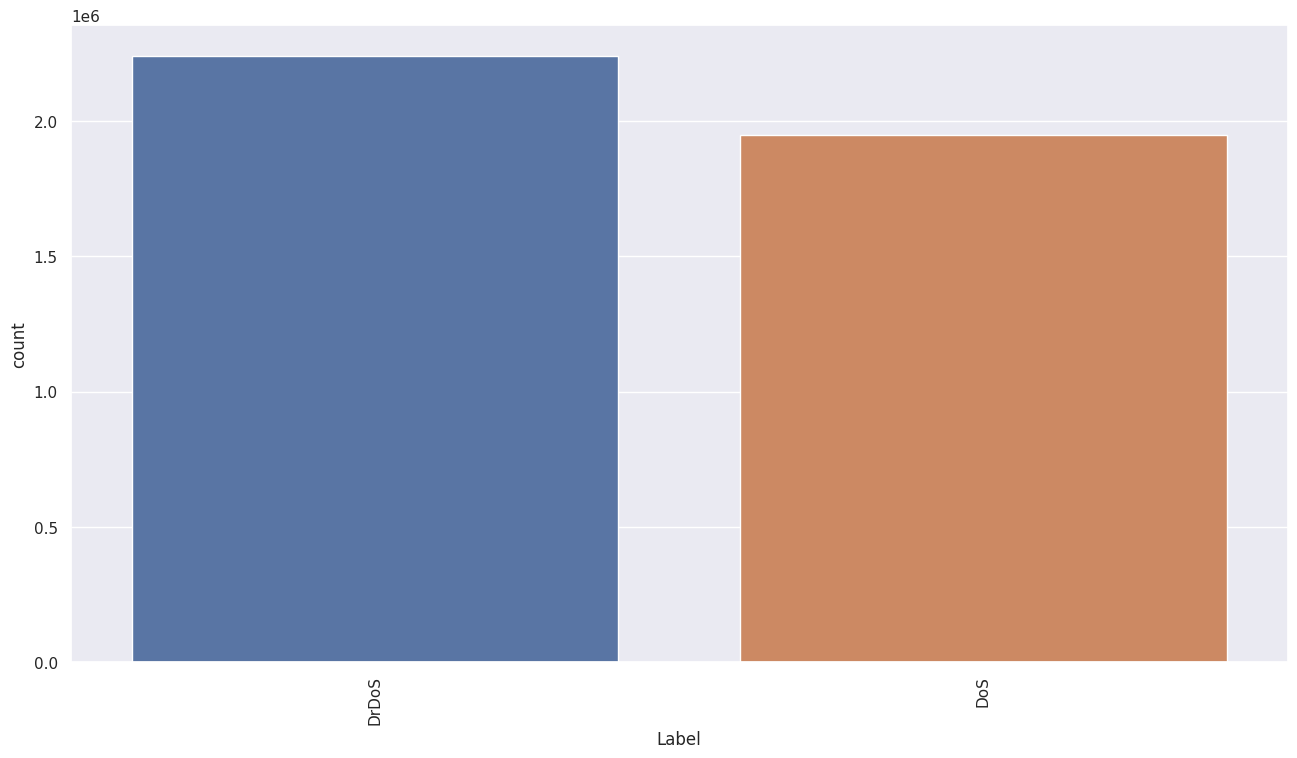

<Figure size 1570x827 with 0 Axes>

In [5]:
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()

## Protocol Based

_________ Type attacks _________$
       0       1       2        3       4       5       6       7        8   \
0     DNS    LDAP   MSSQL  NetBIOS     NTP    SNMP    SSDP     UDP  Portmap   
1  267168  509852  599085   491323  299809  279104  292411  796503   138436   

       9       10  
0     Syn    TFTP  
1  231134  286700  
_________              _________$


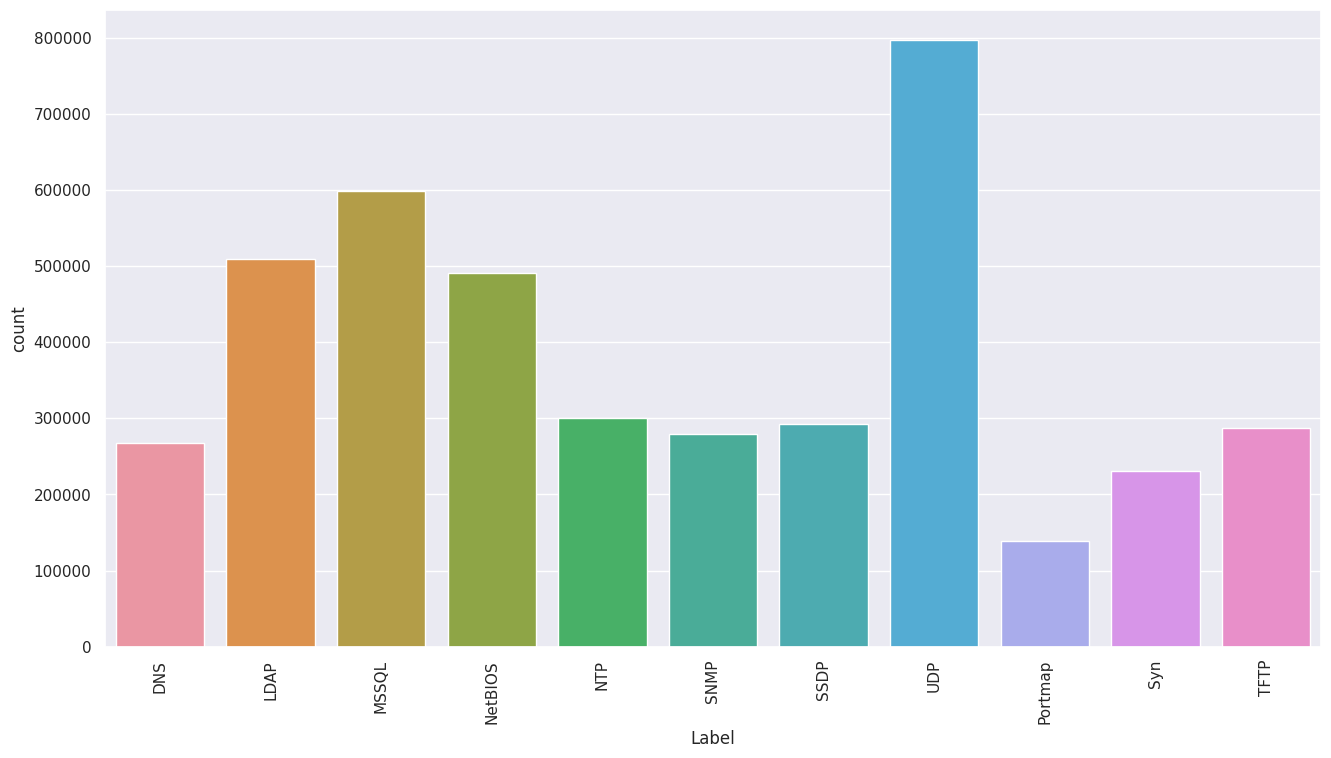

<Figure size 1570x827 with 0 Axes>

In [11]:
attack_groups = {
    "DNS": ["DrDoS_DNS"],
    "LDAP": ["DrDoS_LDAP", "LDAP"],
    "MSSQL": ["DrDoS_MSSQL", "MSSQL"],
    "NetBIOS": ["DrDoS_NetBIOS", "NetBIOS"],
    "NTP": ["DrDoS_NTP"],
    "SNMP": ["DrDoS_SNMP"],
    "SSDP": ["DrDoS_SSDP"],
    "UDP": ["DrDoS_UDP", "UDP", "UDP-lag"],
    "Portmap": ["Portmap"],
    "Syn": ["Syn"],
    "TFTP": ["TFTP"],
    "HTTP": ["DDOS HOIC", "DDoS LOIC-HTTP", "DoS Slowhttptest", "DoS Hulk", "DoS GoldenEye", "DoS slowloris"],
    "LOIT": ["DDoS-LOIT"]
}

for group, attacks in attack_groups.items():
    for attack in attacks:
        df.loc[df['Label'] == attack, 'Label'] = group

        
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()


## Grouped Structer 5 Classes

In [ ]:
attack_groups = {
    "Reflection-TCP": ["DrDoS_MSSQL", 
                              "MSSQL","DrDoS_SSDP"],
    "Reflection-TCP-UDP": ["DrDoS_DNS","DrDoS_LDAP", "LDAP",
                             "DrDoS_NetBIOS", "NetBIOS","DrDoS_SNMP","Portmap"],
    "Reflection-UDP": ["DrDoS_NTP","TFTP"],
    "Exploitation-UDP": ["DrDoS_UDP", "UDP", "UDP-lag"],
    "Exploitation-TCP": ["Syn"]
}

for group, attacks in attack_groups.items():
    for attack in attacks:
        df.loc[df['Label'] == attack, 'Label'] = group

        
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'dataset' with a column 'class_label' indicating the class

# Set the desired number of instances per class
n_instances_per_class = 231134  

# Group the dataset by the 'class_label' column
grouped = df.groupby('Label')

# Create an empty DataFrame to store the sampled data
new_df = pd.DataFrame()

# Iterate over each group (class)
for group_name, group_data in grouped:
    # Sample 'n_instances_per_class' instances from each group
    sampled_group = group_data.sample(n=n_instances_per_class, replace=True)
    # Append the sampled group to the sampled dataset
    new_df = new_df.append(sampled_group)

# Reset the index of the sampled dataset
new_df.reset_index(drop=True, inplace=True)

# The 'sampled_dataset' now contains the desired number of instances per class

# Shuffle the reduced dataset if desired
df = new_df.sample(frac=1, random_state=42)
print('_________ Type attacks _________$')
print(pd.DataFrame([df['Label'].unique(),[df[df['Label']==value]['Label'].value_counts()[0] for value in df['Label'].unique()]]))
print('_________              _________$')        
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15.7,8.27)})
p=sns.countplot(x='Label', data=df)
plt.xticks(rotation=90)
plt.show()
plt.clf()

# Data Transformation

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate the target variable
X = df.drop(["Label"], axis=1)
le = LabelEncoder()
y = le.fit_transform(df["Label"])
print(le.classes_)
del df
# Get number of input features and number of classes for network
n_features = X.shape[1]
n_classes = np.unique(y).shape[0]
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
del X, y

['DNS' 'LDAP' 'MSSQL' 'NTP' 'NetBIOS' 'Portmap' 'SNMP' 'SSDP' 'Syn' 'TFTP'
 'UDP']


# Machine learning

In [8]:
import numpy as np
import os
import random
import pandas as pd
import pickle
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [13]:

models = [
    #("SVM", SVC(random_state=42, C=1.e-03, kernel='linear', gamma='scale')),
    ("RF", RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini',
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                   max_features='sqrt', n_jobs=-1)),
    ("XGB", XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1,
                           subsample=0.8, colsample_bytree=0.8, n_jobs=-1)),
    ("LGBM", LGBMClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1,
                             subsample=0.8, colsample_bytree=0.8, n_jobs=-1)),
    ("CAT", CatBoostClassifier(random_state=42, iterations=100, depth=6, learning_rate=0.1,
                                l2_leaf_reg=1, thread_count=multiprocessing.cpu_count())),
    #("KNN", KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree')),
    #("NB", GaussianNB()),
    ("ADA", AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=0.1,
                                algorithm='SAMME.R'))
]

model_dir = "dataset_2019_Protocol"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

metrics = {
    "Accuracy": accuracy_score,
    "F1 Score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score
}

eval_results = {metric: [] for metric in metrics}

for name, model in models:
    print(f"Starting training for {name}...")
    model.fit(X_train, y_train)

    model_path = os.path.join(model_dir, name + ".pkl")
    y_pred = model.predict(X_test)

    Accuracy = accuracy_score(y_test, y_pred)
    eval_results["Accuracy"].append(Accuracy)  
    print("Accuracy",Accuracy)
      
    F1_Score = f1_score(y_test, y_pred, average='weighted')
    eval_results["F1 Score"].append(F1_Score)
    print("F1_Score",F1_Score)  
    
    Precision = precision_score(y_test, y_pred, average='weighted')
    eval_results["Precision"].append(Precision)
    print("Precision",Precision)  
    
    Recall = recall_score(y_test, y_pred, average='weighted')
    eval_results["Recall"].append(Recall)
    print("Recall",Recall)  

    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

results = pd.DataFrame({"Model": [name for name, _ in models]})
for metric_name in metrics:
    results[metric_name] = eval_results[metric_name]

results.to_csv(os.path.join(model_dir, "evaluation_results.csv"), index=False)
print("Models and results saved in {}".format(model_dir))

for metric_name in metrics:
    plt.figure(figsize=(10,5))
    plt.bar([name for name, _ in models], eval_results[metric_name])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'Model {metric_name} Comparison')
    plt.savefig(os.path.join(model_dir, f"{metric_name}_plot.png"))
    plt.close()


Starting training for RF...


KeyboardInterrupt: 

# Deep learning

In [ ]:
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Define the model
    model = Sequential()
    model.add(Dense(100, activation=LeakyReLU(), input_shape=(n_features,)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation=LeakyReLU()))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation=LeakyReLU()))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation=LeakyReLU()))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    # For avoid overfitting 
    Early = EarlyStopping(monitor='val_accuracy', restore_best_weights=True, verbose=1, mode="max", patience=20)

    # Checkpoint function
    filepath = "./model/model.hdf5"
    Checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=5)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, 
                    batch_size=1028, verbose=1,
                    callbacks=[Early, Checkpoint])


In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
def plot_loss(x):
    plt.plot(x.history['accuracy'])
    plt.plot(x.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.savefig("./model/loss_plot.png")
    plt.show()
#plotting the results 
plot_loss(history)